## Importing libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as ms
import seaborn as sns
import numpy as np
sns.set()

from sklearn.linear_model import LinearRegression


## Loading data

In [57]:
raw_data=pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Pre-processing

In [58]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [59]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [60]:
str(round((100*(172+150)/4350),2)) + "%"

'7.4%'

In [61]:
data_nmv=raw_data.dropna(axis=0)
data_nmv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

## Feature Selection

In [62]:
y=data_nmv['Price']
x=data_nmv[['Mileage','EngineV','Year']]



In [63]:
from sklearn.feature_selection import f_regression
p_value=f_regression(x,y)[1].round(3)
p_value


array([0., 0., 0.])

### Explore distributions

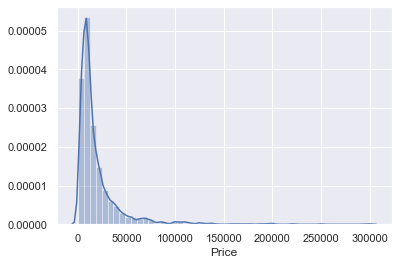

In [64]:
sns.distplot(data_nmv['Price'])

#### 'price' ouliers

### price outlayers been ignored !!

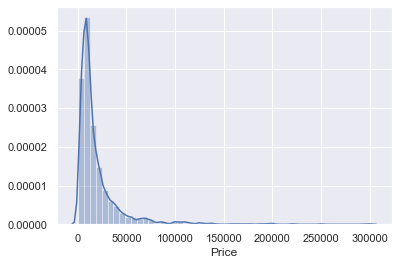

In [65]:
data_1=data_nmv
sns.distplot(data_1['Price'])

#### 'Mileage' outlayers

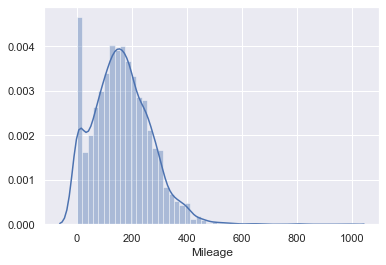

In [66]:
sns.distplot(data_1['Mileage'])

In [67]:
###  Mileage 
data_2=data_1[data_1['Mileage']<600]

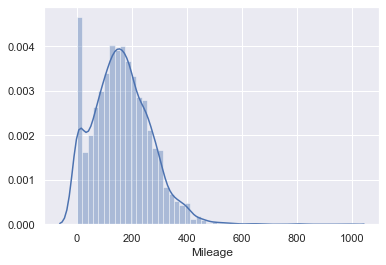

In [68]:
sns.distplot(data_1['Mileage'])

#### 'EngineV' outlayers

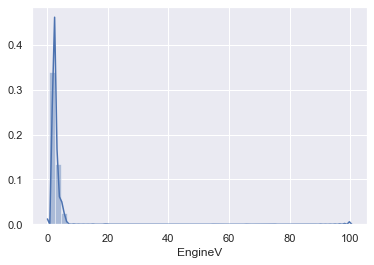

In [69]:
sns.distplot(data_nmv['EngineV'])

In [108]:
data_3=data_2[data_2['EngineV']<6.5]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3996,3996.000000,3996,3996.000000,3996.000000,3996,3996,3996.000000,3996
unique,7,NaN,6,NaN,NaN,4,2,NaN,305
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,873,NaN,1522,NaN,NaN,1849,3631,NaN,188
mean,NaN,19604.933423,NaN,162.498248,2.466249,NaN,NaN,2006.395395,NaN
std,NaN,25871.691551,NaN,100.879602,0.973537,NaN,NaN,6.696856,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


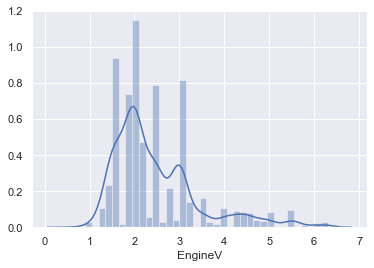

In [109]:
sns.distplot(data_3['EngineV']) 

#### 'year' outlayers

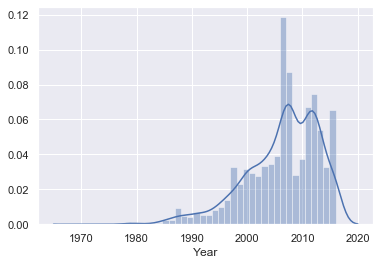

In [110]:
sns.distplot(data_nmv['Year'])

In [111]:
### Year 
data_3=data_3[data_3['Year']>=1988]

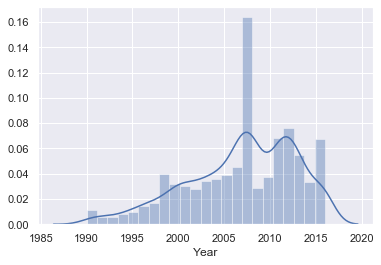

In [112]:
data_4=data_3
sns.distplot(data_4['Year'])

In [113]:
q = data_4['price'].quantile(0.99)
data_5 = data_4[data_4['price']<q]

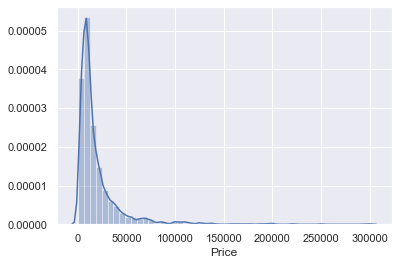

In [163]:
sns.distplot(data_nmv['Price'])

### Data cleaned

In [124]:
data_cleaned=data_4
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3896,3896.000000,3896,3896.000000,3896.000000,3896,3896,3896.000000,3896
unique,7,NaN,6,NaN,NaN,4,2,NaN,288
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,846,NaN,1459,NaN,NaN,1827,3532,NaN,181
mean,NaN,20030.782626,NaN,160.415298,2.478293,NaN,NaN,2006.911961,NaN
std,NaN,26057.088520,NaN,98.840279,0.979180,NaN,NaN,5.922105,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1990.000000,NaN
25%,NaN,7300.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11800.000000,NaN,156.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,22125.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


In [125]:
y=data_nmv['Price']
x=data_nmv[['Mileage','EngineV','Year']]
p_value=f_regression(x,y)[1].round(5)
Summary=pd.DataFrame(p_value,columns=['p-value'])
Summary

,p-value
0,0.0000
1,0.0002
2,0.0000


# Checking the OLS assumptions

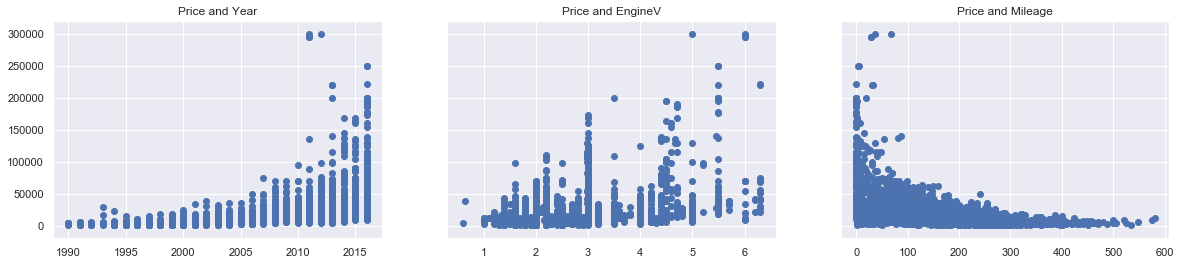

In [126]:
f,(ax1, ax2, ax3)=plt.subplots(1,3,sharey=True , figsize =(20,4))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

## relaxing assumptions

### convert price to a normal distribution

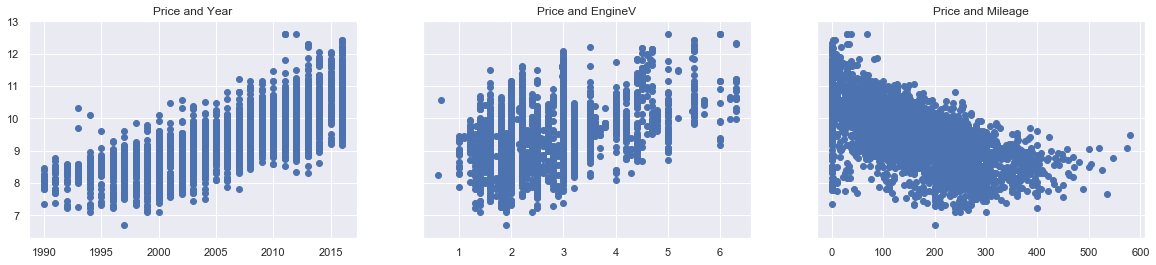

In [127]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price

f,(ax1, ax2, ax3)=plt.subplots(1,3,sharey=True , figsize =(20,4))

ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')

plt.show()

### Multicolinearity

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,3.611416,Mileage
1,10.230254,Year
2,7.412162,EngineV


In [129]:
#when vif >10 we don't consider it 
#The reasons is there some colinearity between mileage and year of production
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)
variables = data_no_multicollinearity[['Mileage','EngineV']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,2.614902,Mileage
1,2.614902,EngineV


In [130]:
data_no_multicollinearity.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
count,3896,3896.000000,3896,3896.000000,3896.000000,3896,3896,3896,3896.000000
unique,7,NaN,6,NaN,NaN,4,2,288,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,E-Class,NaN
freq,846,NaN,1459,NaN,NaN,1827,3532,181,NaN
mean,NaN,20030.782626,NaN,160.415298,2.478293,NaN,NaN,NaN,9.453703
std,NaN,26057.088520,NaN,98.840279,0.979180,NaN,NaN,NaN,0.904700
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,NaN,6.684612
25%,NaN,7300.000000,NaN,90.000000,1.800000,NaN,NaN,NaN,8.895630
50%,NaN,11800.000000,NaN,156.000000,2.200000,NaN,NaN,NaN,9.375855
75%,NaN,22125.000000,NaN,225.000000,3.000000,NaN,NaN,NaN,10.004462


## Create dummy variables

In [131]:
#data_no_multicollinearity['New_model']=data_no_multicollinearity['Brand'] + ' m-'+ data_no_multicollinearity['Model']

#data_no_multicollinearity=data_no_multicollinearity.drop('Brand',axis=1)
data_no_multicollinearity=data_no_multicollinearity.drop('Model',axis=1)
data_no_multicollinearity=data_no_multicollinearity.drop('Price',axis=1)
#data_no_multicollinearity=data_no_multicollinearity.drop('Body',axis=1)
#data_no_multicollinearity=data_no_multicollinearity.drop('Registration',axis=1)
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [132]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head(8)

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
5,0,5.5,12.206068,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6,438,2.0,8.716044,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
7,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [133]:
columns=data_with_dummies.columns.values
columns

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [135]:
data_meta=data_with_dummies[['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]
data_meta.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [136]:
variables = data_with_dummies.drop(['log_price'],axis=1)
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,4.205576,Mileage
1,7.704075,EngineV
2,2.284431,Brand_BMW
3,2.994947,Brand_Mercedes-Benz
4,1.638854,Brand_Mitsubishi
5,2.089833,Brand_Renault
6,2.170300,Brand_Toyota
7,2.851144,Brand_Volkswagen
8,1.445143,Body_hatch
9,1.546732,Body_other


### Feature selection

In [137]:
y=data_meta['log_price']
x=data_meta.drop('log_price',axis=1)

In [138]:
from sklearn.feature_selection import f_regression

p_value=f_regression(x,y)[1].round(3)
table_p_value=pd.DataFrame(p_value,index=data_meta.drop('log_price',axis=1).columns )
table_p_value

,0
Mileage,0.000
EngineV,0.000
Brand_BMW,0.000
Brand_Mercedes-Benz,0.000
Brand_Mitsubishi,0.000
Brand_Renault,0.000
Brand_Toyota,0.000
Brand_Volkswagen,0.000
Body_hatch,0.000
Body_other,0.003


# Linear Regression

In [139]:
#declare outputs and input of the regression

output= data_meta['log_price']
inputs=data_meta.drop(['log_price'],axis=1)

In [140]:
p_value=f_regression(x,y)[1].round(3)
table_p_value=pd.DataFrame(p_value,index=data_meta.drop('log_price',axis=1).columns )
table_p_value

,0
Mileage,0.000
EngineV,0.000
Brand_BMW,0.000
Brand_Mercedes-Benz,0.000
Brand_Mitsubishi,0.000
Brand_Renault,0.000
Brand_Toyota,0.000
Brand_Volkswagen,0.000
Body_hatch,0.000
Body_other,0.003


## Scale inputs

In [141]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [142]:
inputs_scaled=scaler.transform(inputs)

## train test split

In [143]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, output, test_size= 0.2, random_state=365)

## Create regression

In [144]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
y_hat=reg.predict(x_train)

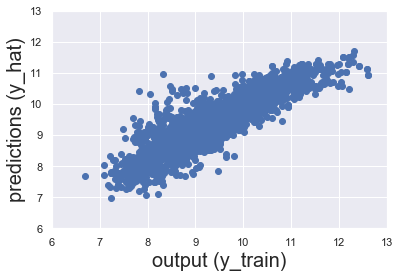

In [146]:
plt.scatter(y_train, y_hat)
plt.xlabel('output (y_train)', size=20)
plt.ylabel('predictions (y_hat)', size=20)

plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

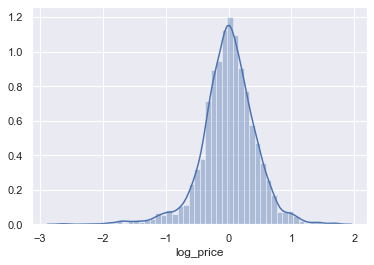

In [147]:
sns.distplot(y_train-y_hat)

In [148]:
reg.score(x_train,y_train)

0.7710933026773162

In [149]:
reg.intercept_

9.452753947172532

In [150]:
reg.coef_

array([-0.48257842,  0.25691856,  0.01822797,  0.02585533, -0.13509082,
       -0.17996892, -0.06068224, -0.07573393, -0.13013763, -0.07841774,
       -0.17208463, -0.10902452, -0.15068931, -0.11889822, -0.02674177,
       -0.14035663,  0.32699751])

In [151]:
reg_summary=pd.DataFrame(inputs.columns.values ,columns=['Features'])
reg_summary['Weight']=reg.coef_

In [152]:
reg_summary

,Features,Weight
0,Mileage,-0.482578
1,EngineV,0.256919
2,Brand_BMW,0.018228
3,Brand_Mercedes-Benz,0.025855
4,Brand_Mitsubishi,-0.135091
5,Brand_Renault,-0.179969
6,Brand_Toyota,-0.060682
7,Brand_Volkswagen,-0.075734
8,Body_hatch,-0.130138
9,Body_other,-0.078418


In [153]:
y_hat_test=reg.predict(x_test)


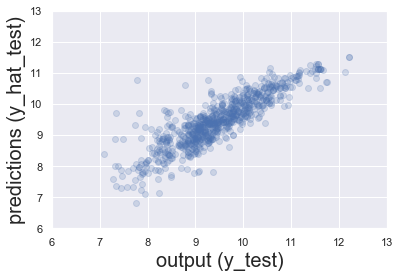

In [154]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('output (y_test)', size=20)
plt.ylabel('predictions (y_hat_test)', size=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


In [155]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,24615.925563
1,15533.653728
2,7366.745273
3,5150.165156
4,22729.961480


In [156]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,24615.925563,NaN
1,15533.653728,7900.0
2,7366.745273,NaN
3,5150.165156,NaN
4,22729.961480,NaN


In [157]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    10.267889
1     9.846917
2     9.296518
3     8.935904
4     9.989665
Name: log_price, dtype: float64

In [158]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,24615.925563,28793.04
1,15533.653728,18900.00
2,7366.745273,10900.00
3,5150.165156,7600.00
4,22729.961480,21800.00
5,29456.438273,22000.00
6,24943.089391,47000.00
7,11724.876421,4700.00
8,7130.016269,5700.00
9,10167.835428,8300.00


In [159]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,24615.925563,28793.04,4177.114437,14.507376
1,15533.653728,18900.00,3366.346272,17.811356
2,7366.745273,10900.00,3533.254727,32.415181
3,5150.165156,7600.00,2449.834844,32.234669
4,22729.961480,21800.00,-929.961480,4.265878
5,29456.438273,22000.00,-7456.438273,33.892901
6,24943.089391,47000.00,22056.910609,46.929597
7,11724.876421,4700.00,-7024.876421,149.465456
8,7130.016269,5700.00,-1430.016269,25.088005
9,10167.835428,8300.00,-1867.835428,22.504041


In [160]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
377,8898.08,8900.00,1.92,0.02
729,32361.16,32400.00,38.84,0.12
281,6990.51,7000.00,9.49,0.14
122,13273.19,13300.00,26.81,0.20
569,12865.15,12900.00,34.85,0.27
705,11534.49,11500.00,-34.49,0.30
605,6974.90,6999.00,24.10,0.34
284,16741.87,16800.00,58.13,0.35
361,16735.63,16800.00,64.37,0.38
238,11945.03,12000.00,54.97,0.46


In [161]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,780.00,780.00,780.00,780.00
mean,17604.92,19505.67,1900.75,39.31
std,15264.18,22797.07,12188.91,89.52
min,916.60,1200.00,-45123.46,0.02
25%,7414.97,7500.00,-2442.11,11.54
50%,12447.72,11800.00,348.22,24.33
75%,22215.79,22725.00,3540.74,40.48
max,99044.51,199999.00,123838.22,1880.14
